<a href="https://colab.research.google.com/github/G-Shivani973/FMML_Projects/blob/main/ClassificationII_lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<b>FMML-ClassificationII-Lab3

In [3]:
#Importing packages
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import matplotlib.pyplot as plt

In [5]:
def performExperiment(trainSet: tuple, testSet: tuple, max_depth: int = None, feature_names: list = None, class_names: list = None, criterion="gini", min_samples_split: int = 2, min_samples_leaf=1, drawTree=(8, 6)):
    clf = tree.DecisionTreeClassifier(max_depth=max_depth,
                                      criterion=criterion,
                                      min_samples_split=min_samples_split,
                                      min_samples_leaf=min_samples_leaf,
                                      splitter="best",
                                      random_state=0,
                                      )
    X_train, y_train = trainSet
    X_test, y_test = testSet

    clf = clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    print("Accuracy of the decision tree on the test set: \n\n{:.3f}\n\n".format(accuracy_score(y_pred, y_test)))

    if drawTree:
        print("Here is a diagram of the tree created to evaluate each sample:")
        fig, ax = plt.subplots(figsize=drawTree)
        imgObj = tree.plot_tree(clf, filled=True, ax=ax, feature_names=feature_names, class_names=class_names, impurity=False, proportion=True, rounded=True, fontsize=10)
        plt.show()


In [6]:
def returnAccuracy(trainSet: tuple, testSet: tuple, max_depth: int = None, feature_names: list = None, class_names: list = None, criterion="gini", min_samples_split: int = 2, min_samples_leaf=1):
    clf = tree.DecisionTreeClassifier(max_depth=max_depth,
                                      criterion=criterion,
                                      min_samples_split=min_samples_split,
                                      min_samples_leaf=min_samples_leaf,
                                      splitter="best",
                                      random_state=0,
                                      )
    X_train, y_train = trainSet
    X_test, y_test = testSet

    clf = clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    return accuracy_score(y_pred, y_test)


In [7]:
def giveAnExample(n: int):
    performExperiment((X_train, y_train), (X_test, y_test), feature_names=iris["feature_names"], class_names=iris["target_names"], max_depth=n)


In [8]:
def plotDecisionBoundary(X, y, pair, clf):
    x_min, x_max = X[:, pair[0]].min() - 1, X[:, pair[0]].max() + 1
    y_min, y_max = X[:, pair[1]].min() - 1, X[:, pair[1]].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    y_pred = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    y_pred = y_pred.reshape(xx.shape)
    plt.figure(figsize=(5, 4))
    plt.contourf(xx, yy, y_pred, alpha=0.4)
    plt.scatter(X[:, pair[0]], X[:, pair[1]], c=y, s=50, edgecolor='k')
    plt.show()


In [9]:
np.random.seed(0)
ar = np.vstack([
    np.random.multivariate_normal(np.array([1, 1]), 1.5 * np.array([[2, -1], [-1, 2.0]]), size=50),
    np.random.multivariate_normal(np.array([3, 3]), 2 * np.array([[0.75, -0.5], [-0.5, 0.75]]), size=50),
])

testAr = np.vstack([
    np.random.multivariate_normal(np.array([1, 1]), np.array([[0.5, -0.25], [-0.25, 0.5]]), size=500),
    np.random.multivariate_normal(np.array([3, 3]), np.array([[0.75, -0.5], [-0.5, 0.75]]), size=500),
])
testy = np.array([0] * int((testAr.shape[0] / 2)) + [1] * int((testAr.shape[0] / 2)))


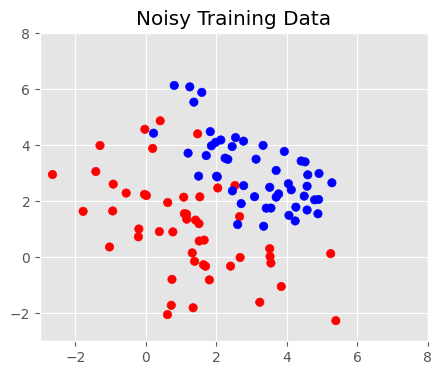

In [10]:
plt.figure(figsize=(5, 4))
plt.style.use("ggplot")
plt.scatter(ar[:, 0], ar[:, 1], c=np.array(["r"] * int((ar.shape[0] / 2)) + ["b"] * int((ar.shape[0] / 2))), )
plt.title("Noisy Training Data")
plt.xlim((-3, 8))
plt.ylim((-3, 8))
plt.show()


(-3.0, 8.0)

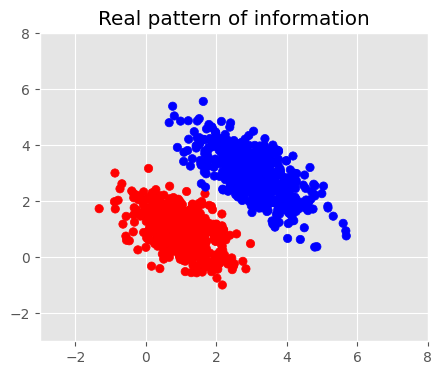

In [12]:
plt.figure(figsize=(5, 4))
plt.title("Real pattern of information")
plt.scatter(testAr[:, 0], testAr[:, 1], c=np.array(["r"] * int((testAr.shape[0] / 2)) + ["b"] * int((testAr.shape[0] / 2))), )
plt.xlim((-3, 8))
plt.ylim((-3, 8))


In [14]:
iris = load_iris()
X = iris.data
y = iris.target


Depth = 1


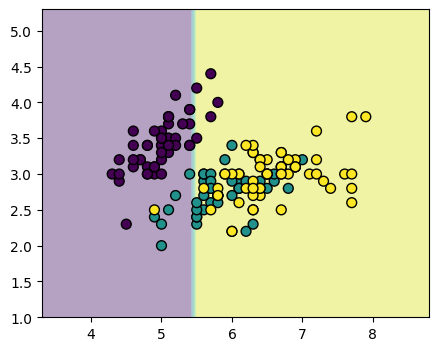

Depth = 2


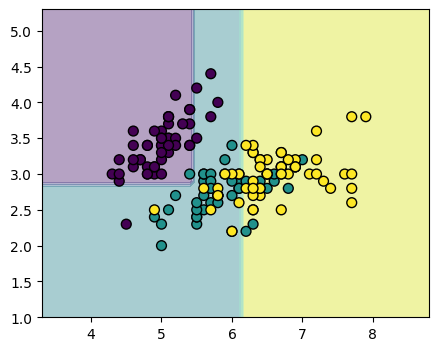

Depth = 4


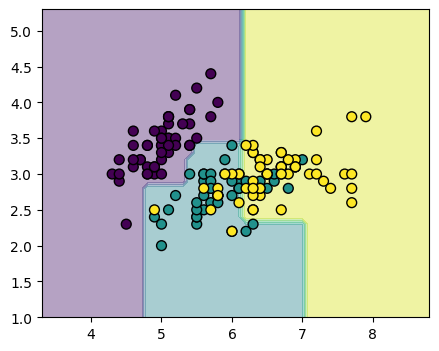

Depth = 8


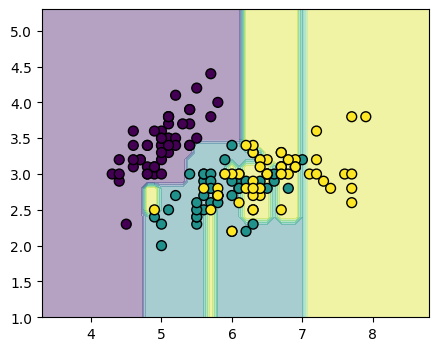

1.0

In [21]:
def boundaryExp(d):
    clf = tree.DecisionTreeClassifier(random_state=0, max_depth=d)
    pair = [0, 1]
    clf.fit(X[:, pair], y)
    print("Depth = {}".format(d))
    plotDecisionBoundary(X, y, pair, clf)
    plt.show()

_ = [boundaryExp(i) for i in [1, 2, 4, 8]]

plt.style.use("default")
plt.style.use("default")
plt.style.use("default")

2 / 2




